<center> <h1>Module 3 - Simple Linear Regression Model Inference</h1> </center>
<center> <h2>Class Coding Analysis</h2> </center>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm

ModuleNotFoundError: No module named 'statsmodels'

## Data and Description

Recent increases in gas prices make buyers more prone to purchase a car with better gas mileage, as measured by the **miles per gallon (MPG)**. Because of this, car manufacturers are increasingly trying to produce the car that gives the best MPG. Complicating this process are the many factors that go into determining what gas mileage a car will achieve on the road.

One such factor is the **weight** of the car. While 
it is generally understood that heavier cars will experience fewer MPG, there is little understanding of how much an increase in weight will lead to a decrease MPG. By understanding this relationship, manufacturers will be able to perform a cost--benefit analysis that will assist them in their vehicle production.

The MPG data set contains measurements of the **weight (column 1)** (in pounds) and **MPG (column 2)** of 289 cars. Download the MPGData.txt file from Canvas, and put it in the same folder as this ipynb file.

### Read in the data set, and look at a summary of the data.

In [2]:
# Note: this code is all from Module 1
cars = pd.read_table("MPGData.txt", 
                     delimiter = ' ')
cars.head()

,Weight,MPG
0,3436,18.0
1,3433,16.0
2,3449,17.0
3,3086,14.0
4,2372,24.0


### Apply linear regression to the (log(Y)) *transformed* data

In [3]:
# Note: this code is all from Module 2
# Fit model with log(Y) transform
cars['MPG_trans'] = np.log(cars['MPG'])
y = cars['MPG_trans']
X = sm.add_constant(cars['Weight'])

mod = sm.OLS(y, X)
res_trans = mod.fit()
print(res_trans.summary())

cars['residuals_trans'] = res_trans.resid
cars['fittedvalues_trans'] = res_trans.fittedvalues

                            OLS Regression Results                            
Dep. Variable:              MPG_trans   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     339.1
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           1.54e-50
Time:                        13:02:55   Log-Likelihood:                 100.46
No. Observations:                 289   AIC:                            -196.9
Df Residuals:                     287   BIC:                            -189.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2262      0.054     78.443      0.0

In [4]:
X

,const,Weight
0,1.0,3436
1,1.0,3433
2,1.0,3449
3,1.0,3086
4,1.0,2372
...,...,...
284,1.0,2790
285,1.0,2130
286,1.0,2295
287,1.0,2625


### Save the back-transformed predictions to the cars dataframe.

In [5]:
cars['fittedvalues_orig_scale'] = np.exp(res_trans.fittedvalues)
cars.head()

,Weight,MPG,MPG_trans,residuals_trans,fittedvalues_trans,fittedvalues_orig_scale
0,3436,18.0,2.890372,-0.014834,2.905206,18.269005
1,3433,16.0,2.772589,-0.133771,2.906359,18.290089
2,3449,17.0,2.833213,-0.066995,2.900208,18.177923
3,3086,14.0,2.639057,-0.400712,3.039769,20.900419
4,2372,24.0,3.178054,-0.136225,3.314278,27.502540


### Create a scatterplot of the data, and overlay the *transformed* linear regression line.

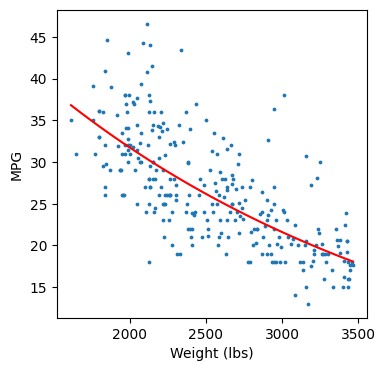

In [6]:
# Note: this code is adapted from Module 2

# Create a sequence of 100 Weight values
weight_values = np.linspace(cars['Weight'].min(), 
                            cars['Weight'].max(), 
                            num = 100)

# Predict log(MPG) using the linear model using the newly created Weight values
X = sm.add_constant(pd.DataFrame({'Weight': weight_values}))
log_mpg_preds = res_trans.predict(X)

# Back-transform the predictions (y_i-hat) to MPG
mpg_preds = np.exp(log_mpg_preds)

# Store results in a DataFrame for plotting
preds = pd.DataFrame({"Weight_values": weight_values, 
                      "MPG_preds": mpg_preds})

# Plot the predictions on the original scale

def cars_scatter_ols(x, y):
    plt.figure(figsize = (4, 4))
    plt.scatter(x, 
                y, 
                s = 3)
    plt.plot(preds['Weight_values'],
             preds['MPG_preds'], 
             color = "r")
    plt.xlabel("Weight (lbs)")
    plt.ylabel("MPG")
    
cars_scatter_ols(cars['Weight'], cars['MPG'])
plt.show()

## Statistical Inference for the Slope

### Call (print) the 95% confidence interval for the slope as reported in the summary output.

In [7]:
# dir(res_trans)

In [8]:
# res_trans.conf_int()

In [9]:
res_trans.conf_int().loc['Weight', :]

0   -0.000426
1   -0.000343
Name: Weight, dtype: float64

The confidence interval does not include 0 so it is significance.

(including 0 would mean that it probably doesn't matter because there is no effect)

### Call (print) the test stastistic and corresponding p-value from the hypothesis test for the slope. 

In [10]:
# res_trans.tvalues

In [11]:
# res_trans.pvalues

In [12]:
print("The test statistic for Weight is ", 
      round(res_trans.tvalues['Weight'], 2), 
      " and the corresponding p-value is ",
      res_trans.pvalues['Weight'])

The test statistic for Weight is  -18.42  and the corresponding p-value is  1.5406412523069353e-50


## Statistical Inference for the Mean of Y

### Calculate a 95% confidence interval for the average of $Y$ (on the original scale) when $x=3000$ lbs.

In [13]:
pred = res_trans.get_prediction([1, 3000])
np.exp(pred.summary_frame(alpha = 0.05).loc[:, ['mean_ci_lower', 'mean_ci_upper']])

,mean_ci_lower,mean_ci_upper
0,21.01584,22.206616


In [14]:
# dir(pred)

In [15]:
pred.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,3.072833,0.014001,3.045276,3.10039,2.73412,3.411547


In [16]:
print(round(np.exp(3.045276), 3), round(np.exp(3.10039), 3))

21.016 22.207


### Create a confidence band for the average of $Y$ across all values of $X$, and overlay this band (using a distinct color) on your previous scatterplot.

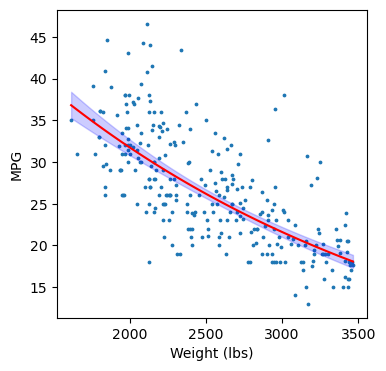

In [17]:
# Define Precip values to predict
x = np.linspace(min(cars['Weight']), 
                max(cars['Weight']), 
                num = 200)
X = np.vstack((np.ones(200), x)).T

# Predict and store results with confidence intervals
pred_trans = res_trans.get_prediction(X).summary_frame(alpha = 0.05)

# Plot the predictions
cars_scatter_ols(cars['Weight'], cars['MPG'])
plt.fill_between(x, 
                 np.exp(pred_trans['mean_ci_lower']), 
                 np.exp(pred_trans['mean_ci_upper']), 
                 color = 'blue',
                 alpha = 0.2)
plt.show()

In [18]:
# X

In [19]:
# pred_trans

## Statistical Inference for the Individual Observations

### Calculate a 95% prediction interval for $Y$ (on the original scale) when $x=3000$ lbs.

In [20]:
pred = res_trans.get_prediction([1, 3000])
np.exp(pred.summary_frame(alpha = 0.05).loc[:, ['obs_ci_lower', 'obs_ci_upper']])

,obs_ci_lower,obs_ci_upper
0,15.396191,30.312086


In [21]:
# pred.summary_frame(alpha = 0.05)

### Create a prediction band for $Y$ across all values of $X$, and overlay this band (using a distinct color) on your previous scatterplot.

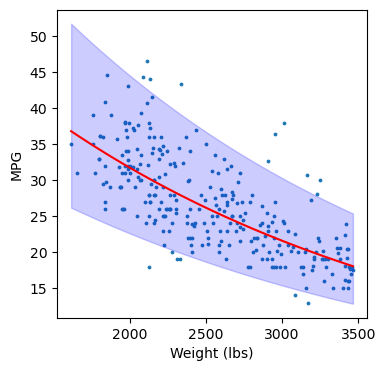

In [22]:
# Plot the predictions
cars_scatter_ols(cars['Weight'], cars['MPG'])
plt.fill_between(x, 
                 np.exp(pred_trans['obs_ci_lower']), 
                 np.exp(pred_trans['obs_ci_upper']), 
                 color = 'blue',
                 alpha = 0.2)
plt.show()

## Model Evaluation Metrics

### Compute the MSE.

In [23]:
mse = np.sum((cars['MPG'] - cars['fittedvalues_orig_scale']) ** 2) / (len(cars) - 2)
mse

22.393368899595856

### Compute the MAE

In [24]:
mae = np.sum(np.abs(cars['MPG'] - cars['fittedvalues_orig_scale'])) / (len(cars) - 2)
mae

3.6126674313708786

### Call (print) the R-Squared value from the model results

In [25]:
round(res_trans.rsquared, 4)

0.5416

### Call (print) the adjusted R-Squared value from the model results

In [26]:
round(res_trans.rsquared_adj, 4)

0.54

### Call (print) the test stastistic and corresponding p-value from the F-test

In [27]:
print("The test statistic for the F-test is ", 
      round(res_trans.fvalue, 2), 
      " and the corresponding p-value is ",
      res_trans.f_pvalue)

The test statistic for the F-test is  339.15  and the corresponding p-value is  1.5406412523071656e-50
